In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score


from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.experimental import enable_halving_search_cv
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer
from sklearn import set_config
set_config("figure")


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve

from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer

from sklearn import svm
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC


# Data Understanding

In this project I will be using real data collected from 917 patients. The dataset contains 17 features for each patient (5 proteins levels and 12 clinical demographics) and nine different outcomes. The goal here is to use the presented features to predict or classify the outcomes. The given five proteins are blood biomarkers collected from the patients through a specific plasma blood analysis. It is important to note that outcome 8, is the project primary outcome. Hence, I will be building my models based on this outcome. Then I will follow the analysis for the remaining secondary outcomes. The outcomes are labeled “0” outcome absent and “1” outcome present.

After selecting the best model to explain the data, I will be able to identify which protein levels and which features are contributing to a certain outcome.

The presented outcomes are costly to manage and better to be treated at early stages. Moreover, most patients have no symptoms especially at early stages. Being able to identify cut-off points for these proteins to classify patients is helpful for medical practice. As health care practitioners will be able to utilize these cut-off points through a simple blood test to predict a certain outcome for a patient. This early diagnosis is better for patient’s health and economically beneficial to the health care system.


Firstly, after loading the file and the essential libraries, I used data.shape, data.columns, data.head(),and data.info() to get an understanding of the dataset.

In [106]:
data = pd.read_csv('data/project.csv', index_col=0)

In [107]:
data.head()

,protein1,protein2,protein3,protein4,protein5,disease,age,sex,hypetension,hypercholesterolemia,...,aspirin,outcome1,outcome2,outcome3,outcome4,outcome5,outcome6,outcome7,outcome8,outcome9
id,,,,,,,,,,,,,,,,,,,,,
150,2.41,2.65,0.64,4.82,2.41,No,82,Male,Yes,Yes,...,Yes,0,1,0,0,0,1,0,1,0
223,1.79,6.15,0.39,1.66,1.79,No,65,Male,No,No,...,No,1,0,0,0,0,0,1,1,0
190,2.00,5.44,0.83,0.46,2.00,No,81,Male,No,Yes,...,Yes,0,1,0,0,0,1,0,1,0
151,2.41,6.70,0.41,0.74,2.41,No,59,Male,No,Yes,...,No,1,1,0,0,0,1,1,1,0
870,2.91,8.33,0.14,13.57,2.91,Yes,61,Male,Yes,Yes,...,Yes,1,0,0,0,0,0,1,1,0


In [108]:
data.shape

(917, 26)

In [109]:
data.columns

Index(['protein1', 'protein2', 'protein3', 'protein4', 'protein5', 'disease',
       'age', 'sex', 'hypetension', 'hypercholesterolemia', 'diabetes',
       'smoking', 'congestive heat failue', 'conay atey disease', 'stoke',
       'statin', 'aspirin', 'outcome1', 'outcome2', 'outcome3', 'outcome4',
       'outcome5', 'outcome6', 'outcome7', 'outcome8', 'outcome9'],
      dtype='object')

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 150 to 577
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   protein1                917 non-null    float64
 1   protein2                917 non-null    float64
 2   protein3                917 non-null    float64
 3   protein4                917 non-null    float64
 4   protein5                917 non-null    float64
 5   disease                 917 non-null    object 
 6   age                     917 non-null    int64  
 7   sex                     913 non-null    object 
 8   hypetension             908 non-null    object 
 9   hypercholesterolemia    909 non-null    object 
 10  diabetes                913 non-null    object 
 11  smoking                 917 non-null    object 
 12  congestive heat failue  901 non-null    object 
 13  conay atey disease      898 non-null    object 
 14  stoke                   870 non-null    

In [111]:
data.rename(columns = {'stoke':'stroke'}, inplace = True)
data.rename(columns = {'conay atey disease':'coronary artery disease'}, inplace = True)
data.rename(columns = {'congestive heat failue':'congestive heart failure'}, inplace = True)
data.rename(columns = {'hypetension':'hypertension'}, inplace = True)

In [112]:
data.describe()

,protein1,protein2,protein3,protein4,protein5,age,outcome1,outcome2,outcome3,outcome4,outcome5,outcome6,outcome7,outcome8,outcome9
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,1.352999,4.522585,1.221821,7.994842,2.885027,67.724100,0.142857,0.115594,0.028353,0.032715,0.014177,0.137405,0.159215,0.261723,0.207197
std,1.499135,3.616671,2.849974,13.949112,1.838336,11.831846,0.350118,0.319912,0.166071,0.177988,0.118283,0.344462,0.366076,0.439812,0.405519
min,0.010000,0.020000,0.010000,0.060000,0.110000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.260000,2.100000,0.270000,0.630000,1.660000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.840000,3.500000,0.490000,2.360000,2.500000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,5.670000,1.040000,8.210000,3.670000,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,12.200000,21.060000,30.100000,94.820000,9.930000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [113]:
((data.isnull().sum() / len(data))*100).sort_values(ascending=False)

stroke                      5.125409
coronary artery disease     2.071974
congestive heart failure    1.744820
hypertension                0.981461
hypercholesterolemia        0.872410
sex                         0.436205
diabetes                    0.436205
aspirin                     0.000000
outcome8                    0.000000
outcome7                    0.000000
outcome6                    0.000000
outcome5                    0.000000
outcome4                    0.000000
outcome3                    0.000000
outcome2                    0.000000
outcome1                    0.000000
protein1                    0.000000
statin                      0.000000
protein2                    0.000000
smoking                     0.000000
age                         0.000000
disease                     0.000000
protein5                    0.000000
protein4                    0.000000
protein3                    0.000000
outcome9                    0.000000
dtype: float64

### Since all missing values for columns are below 40%, I decided to use simple imputer from sklearn to impute categorical variables using the most frequent observation for stroke,coronary artery disease,congestive heart failure,hypertension,hypercholesterolemia,sex, and diabetes

In [114]:
#imputing categorical variables
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(data[['stroke','coronary artery disease','congestive heart failure','hypertension','hypercholesterolemia','sex','diabetes']])
data[['stroke','coronary artery disease','congestive heart failure','hypertension','hypercholesterolemia','sex','diabetes']] = \
imputer.transform(data[['stroke','coronary artery disease','congestive heart failure','hypertension','hypercholesterolemia','sex','diabetes']])

In [115]:
((data.isnull().sum() / len(data))*100).sort_values(ascending=False)

protein1                    0.0
protein2                    0.0
outcome8                    0.0
outcome7                    0.0
outcome6                    0.0
outcome5                    0.0
outcome4                    0.0
outcome3                    0.0
outcome2                    0.0
outcome1                    0.0
aspirin                     0.0
statin                      0.0
stroke                      0.0
coronary artery disease     0.0
congestive heart failure    0.0
smoking                     0.0
diabetes                    0.0
hypercholesterolemia        0.0
hypertension                0.0
sex                         0.0
age                         0.0
disease                     0.0
protein5                    0.0
protein4                    0.0
protein3                    0.0
outcome9                    0.0
dtype: float64

### The boxplot below shows the non-normal distribtuion for proteins and age values.

<AxesSubplot:>

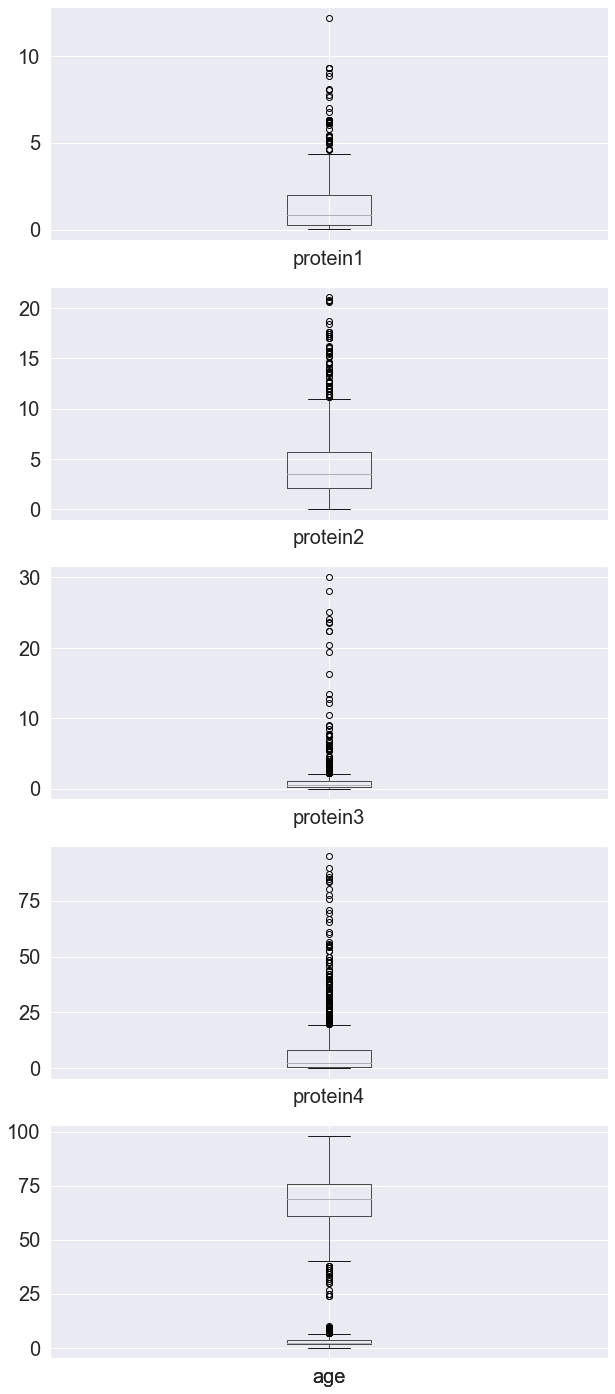

In [116]:
plt.subplots(figsize=(10,30))
plt.subplot(611)
data.boxplot('protein1', fontsize=20)
plt.subplot(612)
data.boxplot('protein2',fontsize=20 )
plt.subplot(613)
data.boxplot('protein3',fontsize=20 )
plt.subplot(614)
data.boxplot('protein4',fontsize=20 )
plt.subplot(615)
data.boxplot('protein5',fontsize=20 )
plt.subplot(615)
data.boxplot('age',fontsize=20 )

### Visualizing average proteins levels for patients with and without outcome 8. Patients with outcome 8 have elevated plasma protein levels compared to patients without outcome 8. The largest different between the two groups was for protein 4.

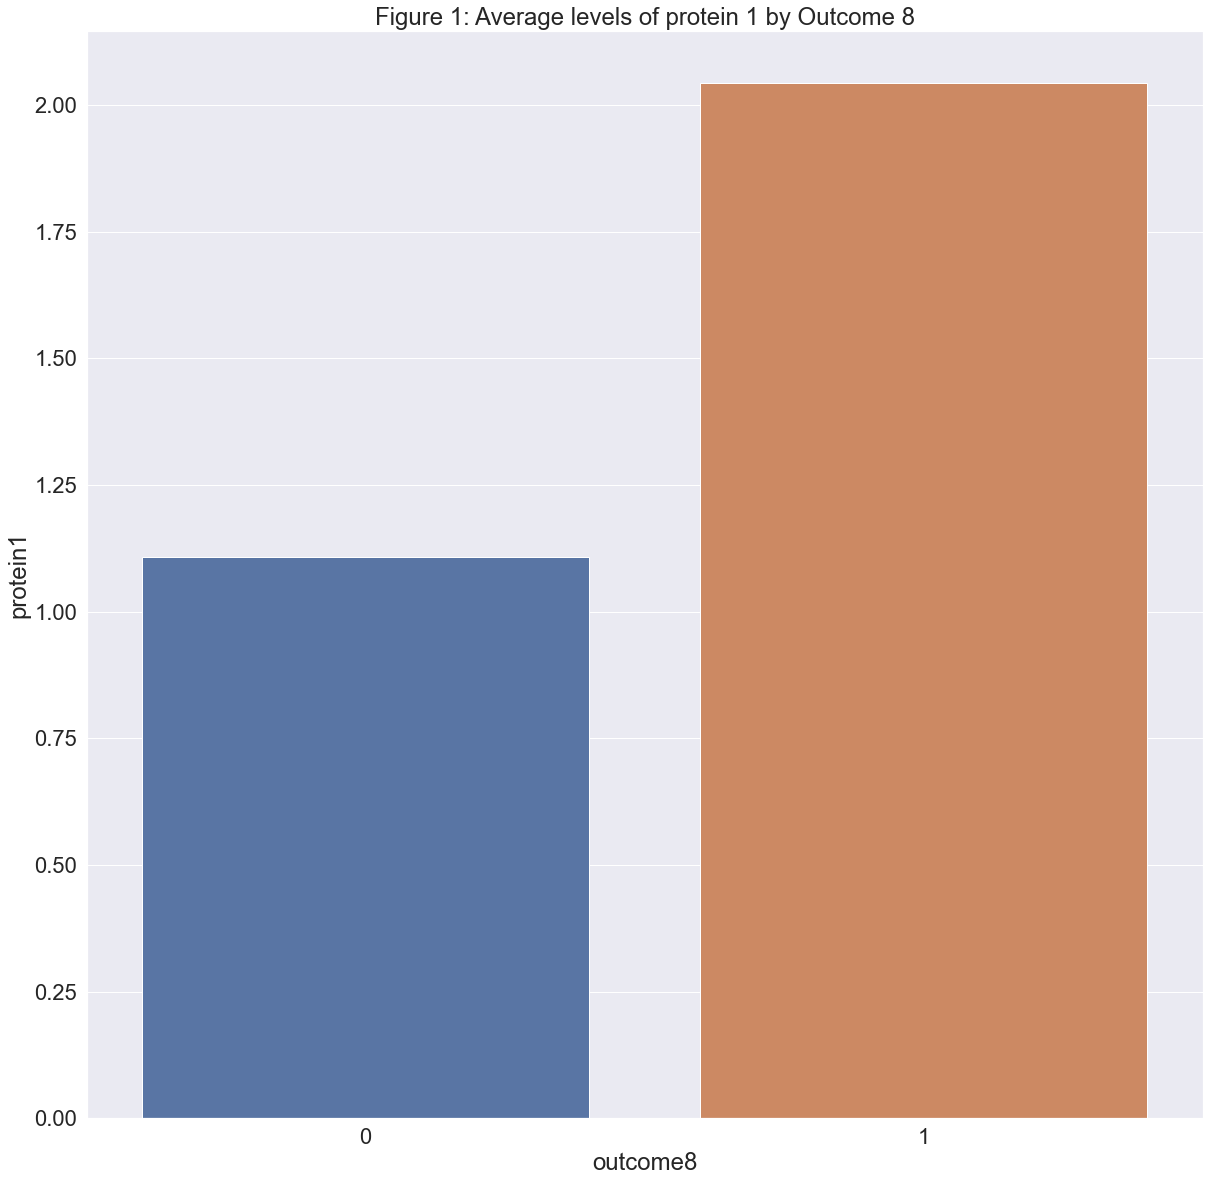

In [117]:
sns.set(font_scale = 2)
Pro1 = data.groupby('outcome8', as_index=False)['protein1'].mean()
Pro1 = Pro1.sort_values(by="protein1",ascending=False)

plt.figure(figsize=(20,20))
plt.title("Figure 1: Average levels of protein 1 by Outcome 8")
p = sns.barplot(x= 'outcome8', y='protein1', data=Pro1, ci=False)

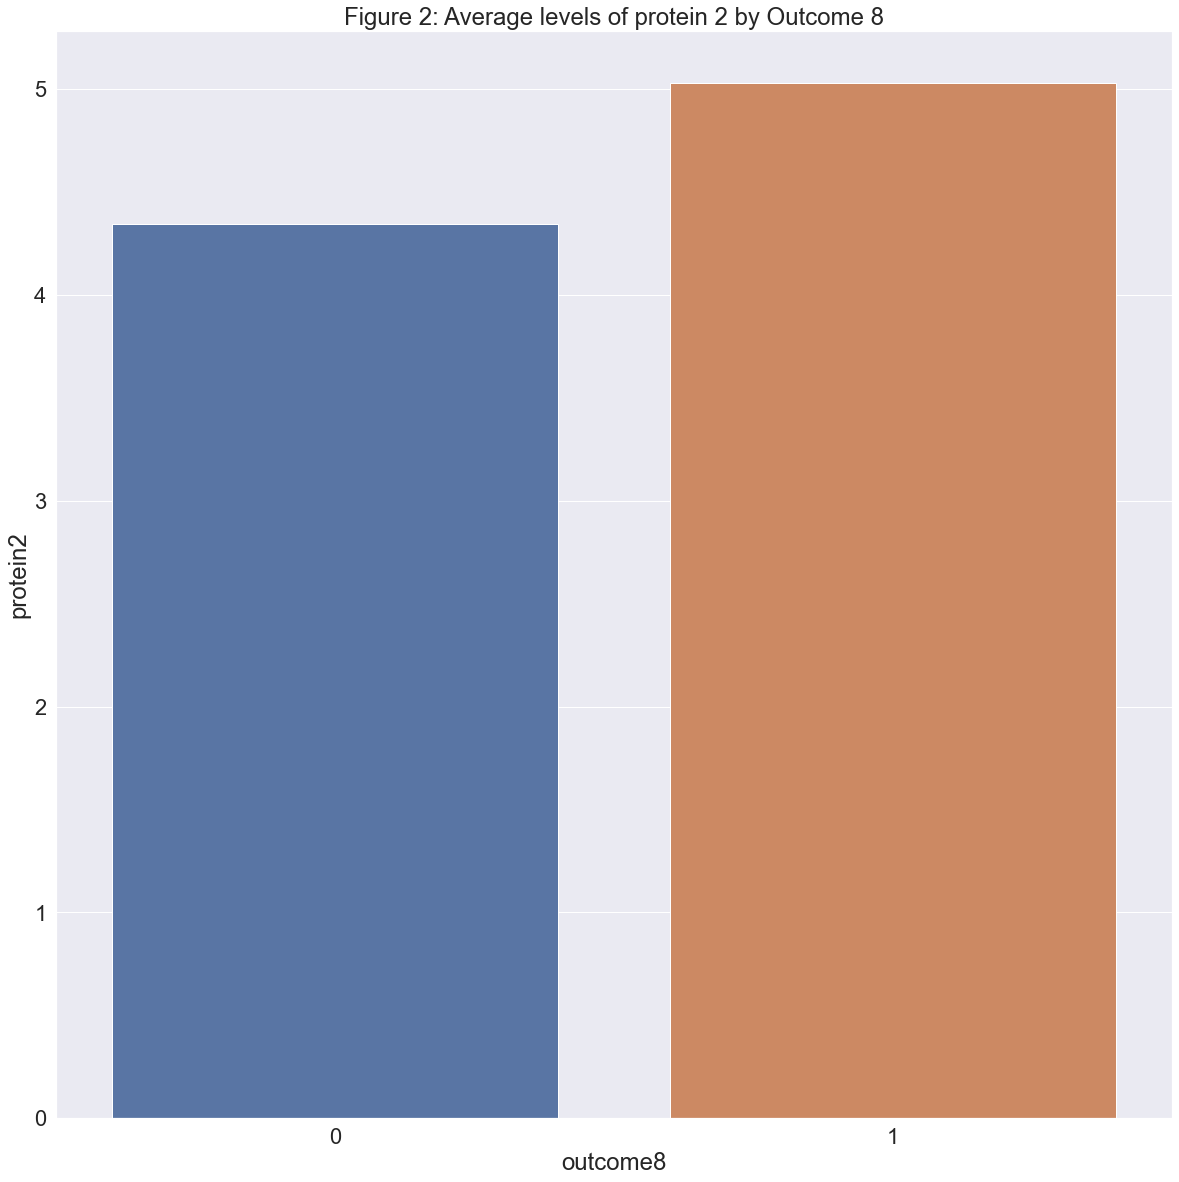

In [118]:
sns.set(font_scale = 2)
Pro2 = data.groupby('outcome8', as_index=False)['protein2'].mean()
Pro2 = Pro2.sort_values(by="protein2",ascending=False)

plt.figure(figsize=(20,20))
plt.title("Figure 2: Average levels of protein 2 by Outcome 8")
p = sns.barplot(x= 'outcome8', y='protein2', data=Pro2, ci=False)

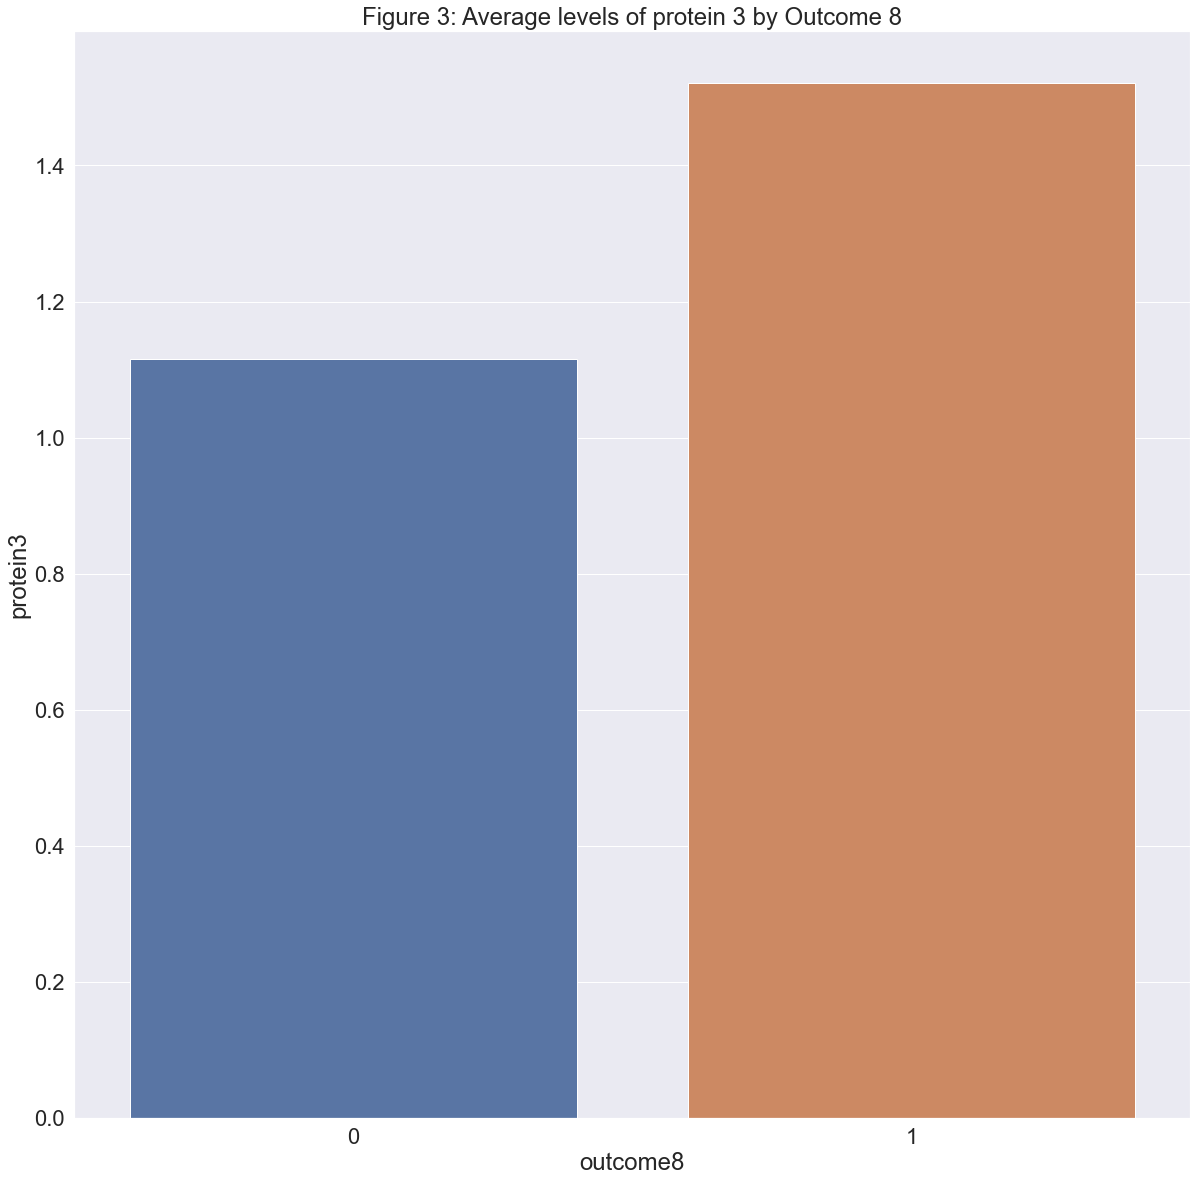

In [119]:
sns.set(font_scale = 2)
Pro3 = data.groupby('outcome8', as_index=False)['protein3'].mean()
Pro3 = Pro3.sort_values(by="protein3",ascending=False)

plt.figure(figsize=(20,20))
plt.title("Figure 3: Average levels of protein 3 by Outcome 8")
p = sns.barplot(x= 'outcome8', y='protein3', data=Pro3, ci=False)

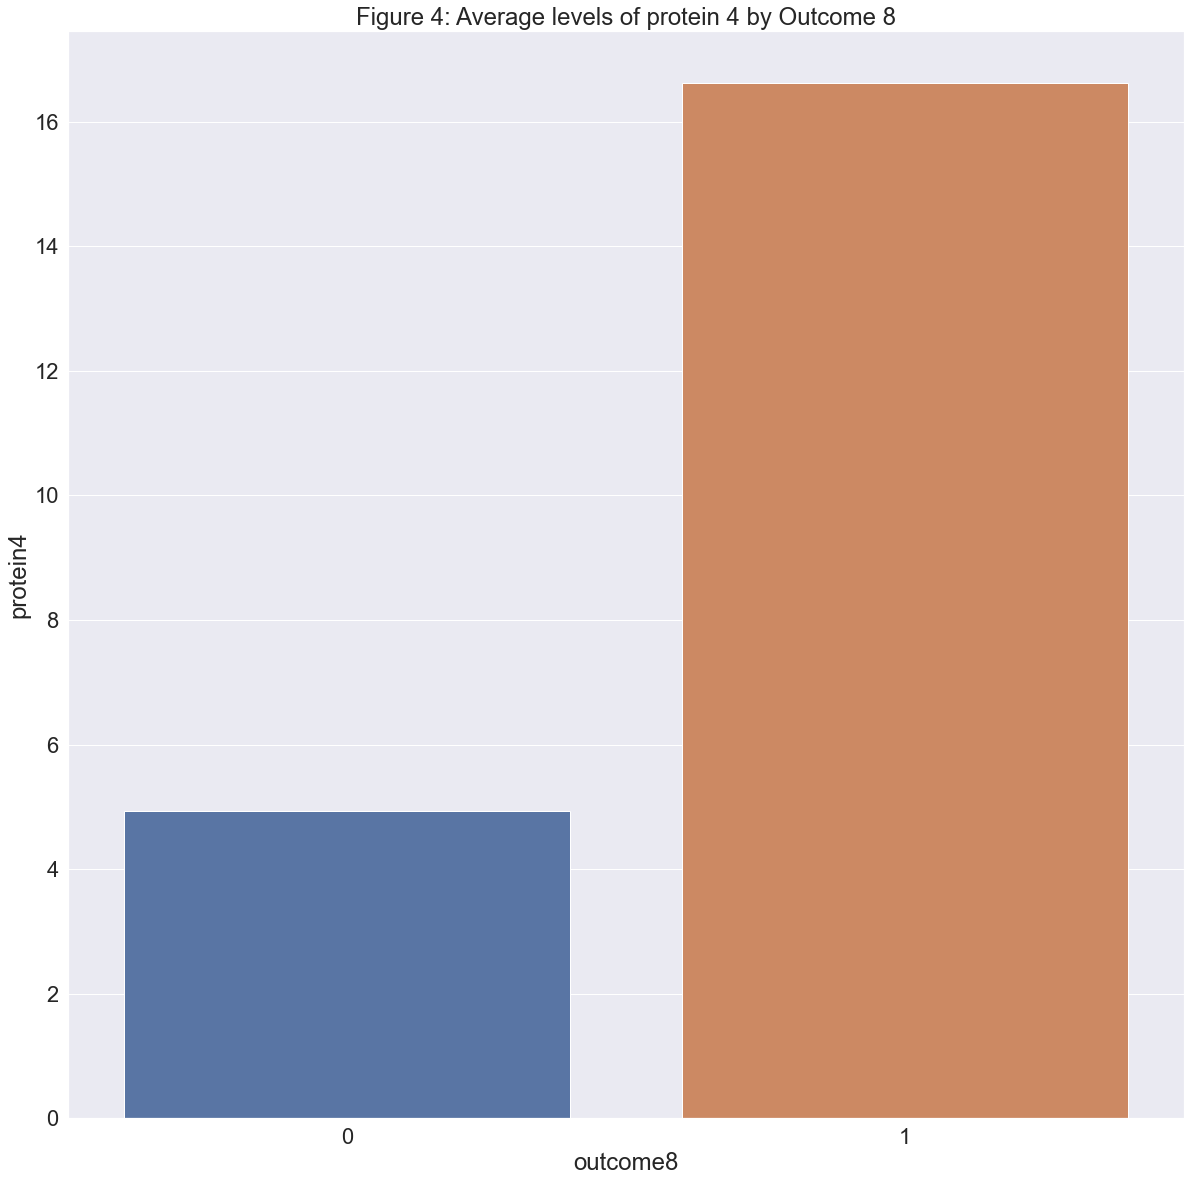

In [120]:
sns.set(font_scale = 2)
Pro4 = data.groupby('outcome8', as_index=False)['protein4'].mean()
Pro4 = Pro4.sort_values(by="protein4",ascending=False)

plt.figure(figsize=(20,20))
plt.title("Figure 4: Average levels of protein 4 by Outcome 8")
p = sns.barplot(x= 'outcome8', y='protein4', data=Pro4, ci=False)

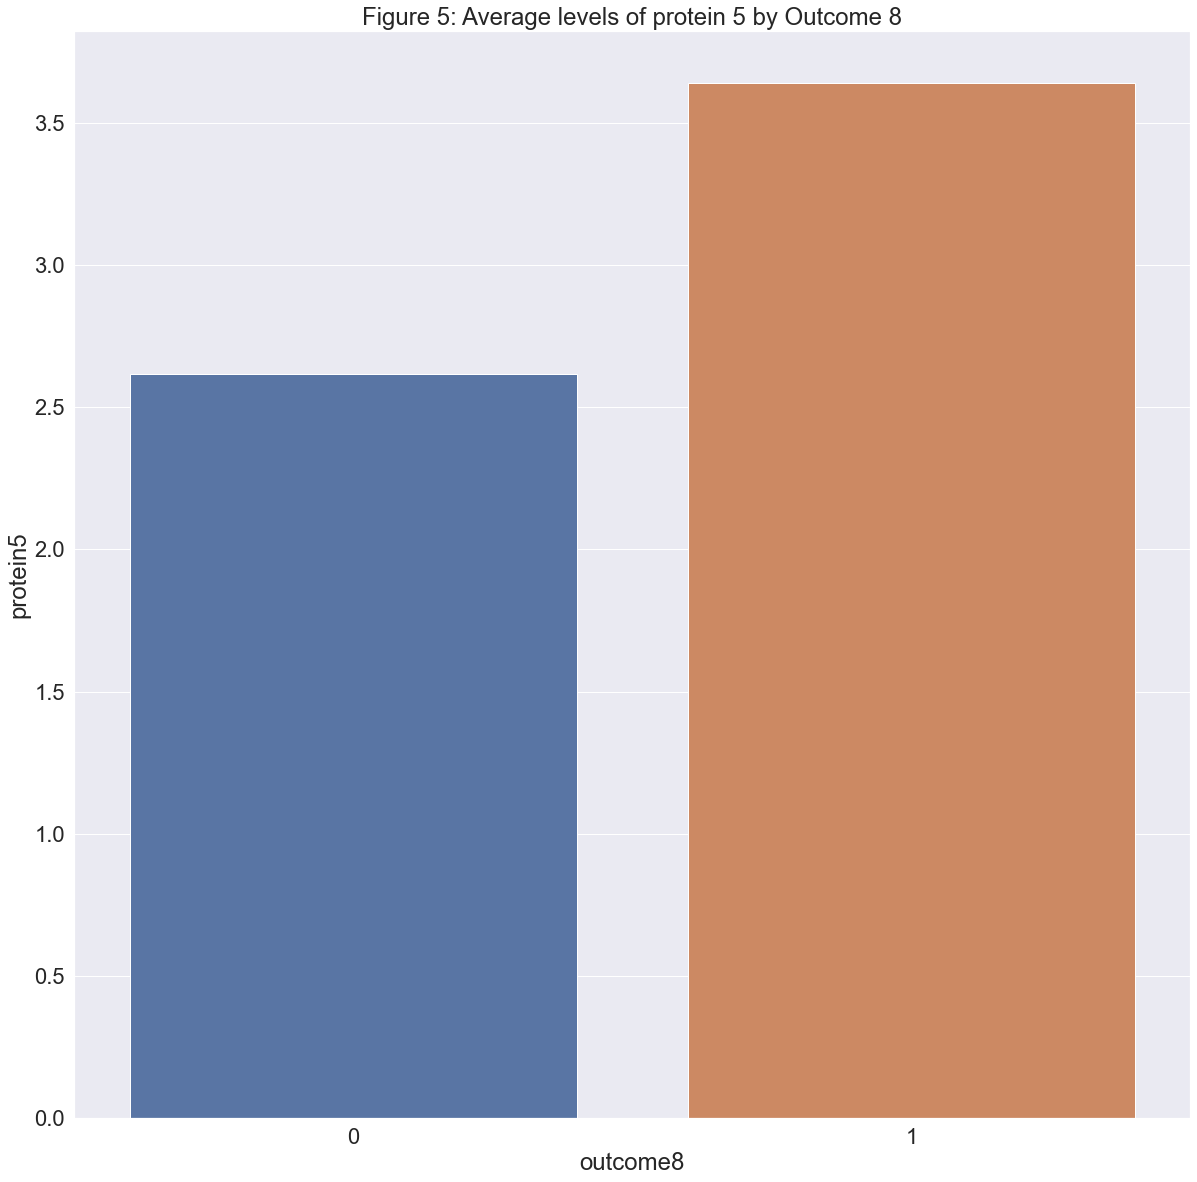

In [121]:
sns.set(font_scale = 2)
Pro5 = data.groupby('outcome8', as_index=False)['protein5'].mean()
Pro5 = Pro5.sort_values(by="protein5",ascending=False)

plt.figure(figsize=(20,20))
plt.title("Figure 5: Average levels of protein 5 by Outcome 8")
p = sns.barplot(x= 'outcome8', y='protein5', data=Pro5, ci=False)

### From the correlations between the study features , I can see the correlations are weak between the study proteins which will not cause collinearity issues in the model. As expected, there are high correlation between certain outcomes. This is because these outcomes are diagnostically related. But this should not be an issue as I am not using these outcomes together in the same model.

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

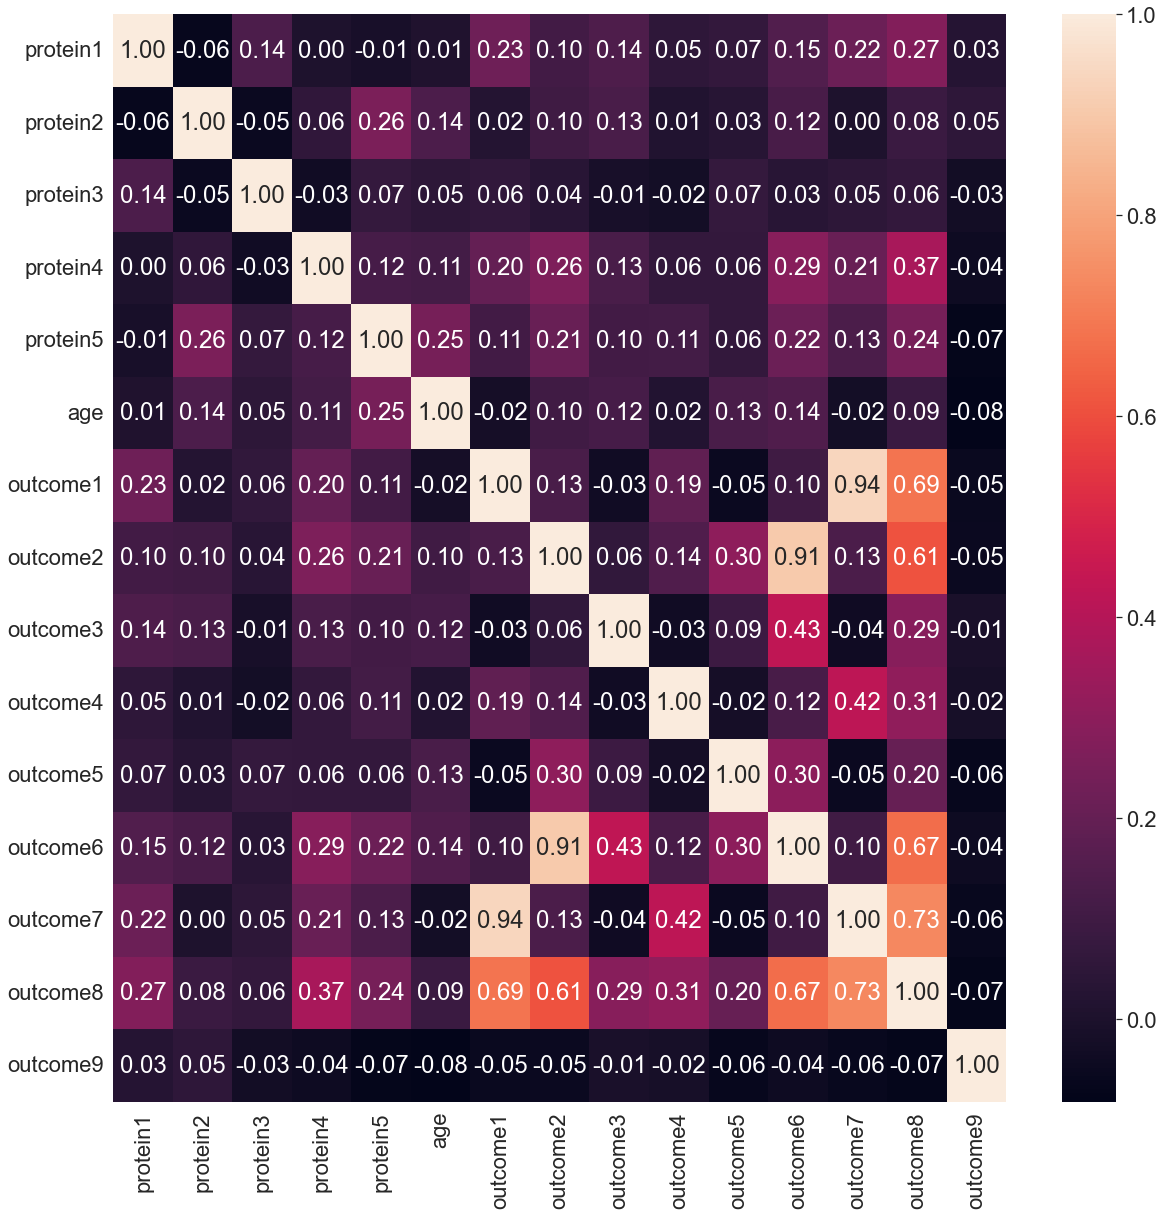

In [122]:
sns.set(font_scale = 2)
plt.tight_layout()
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

Text(0.5, 1.0, 'Percentage of patients who have outcome 9')

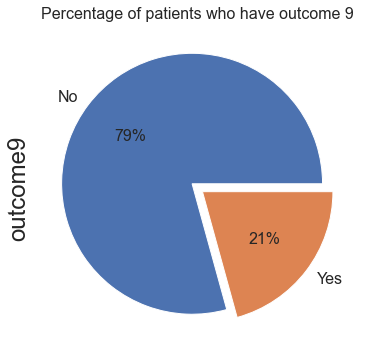

In [123]:
labels = ['No','Yes']
data['outcome9'].value_counts().plot(kind='pie',autopct='%.0f%%',labels = labels, figsize = (6,6), fontsize=16, 
                                     explode = [0.05,0.05])
plt.title("Percentage of patients who have outcome 9", {"size" : 16})

In [124]:
#Crosstabulation to investigate the association between number of patients with a disease and outcome 8 rate
pd.crosstab(data['disease'], data['outcome8'],margins=True, margins_name="Total")

outcome8,0,1,Total
disease,,,
No,190,27,217
Yes,487,213,700
Total,677,240,917


## Preparing the data for analysis

In [125]:
X = data.drop(['outcome1','outcome2','outcome3','outcome4','outcome5','outcome6','outcome7','outcome8','outcome9'], axis = 1)
y1 = data['outcome1']
y2 = data['outcome2']
y3 = data['outcome3']
y4 = data['outcome4']
y5 = data['outcome5']
y6 = data['outcome6']
y7 = data['outcome7']
y8 = data['outcome8']
y9 = data['outcome9']

In [126]:
X = pd.get_dummies(X)

In [127]:
object= StandardScaler()
X = pd.DataFrame(object.fit_transform(X), columns=X.columns)

In [128]:
X_train, X_test, y8_train, y8_test = train_test_split(X,y8, test_size = 0.3, random_state = 42)

# 1. Logistic Regression

In [129]:
#I used the make_column_selector to select features by datatype. 
selector = make_column_selector(dtype_include=object)

#LogisticRegression with L1 penalty to select features for the model.
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver = 'liblinear' ,random_state = 42))

In [130]:
#building the pipeline 
lgr_pipe = Pipeline([('selector', extractor),('lgr', LogisticRegression(random_state=42, max_iter = 1000))])
lgr_pipe.fit(X_train, y8_train)

Pipeline(steps=[('selector',
                 SelectFromModel(estimator=LogisticRegression(penalty='l1',
                                                              random_state=42,
                                                              solver='liblinear'))),
                ('lgr', LogisticRegression(max_iter=1000, random_state=42))])

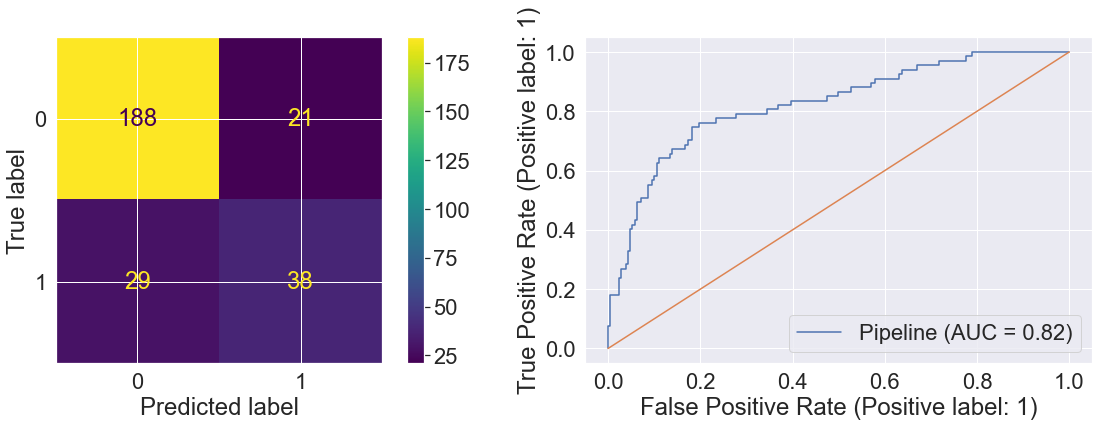

In [131]:
#Examine both the confusion matrix and ROC curve below. 
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(lgr_pipe, X_test, y8_test, ax = ax[0])
RocCurveDisplay.from_estimator(lgr_pipe, X_test, y8_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

In [132]:
#Calculating the accuracy, precision, and recall values.
preds = lgr_pipe.predict(X_test)

log_accuracy = accuracy_score(y8_test, preds)
log_precision = precision_score(y8_test, preds)
log_recall = recall_score(y8_test, preds)

print(f'Accuracy: {log_accuracy: .2f}\nPrecision: {log_precision: .2f}\nRecall: {log_recall: .2f}')


Accuracy:  0.82
Precision:  0.64
Recall:  0.57


# 2. Decision Tree Classifier

In [133]:
params = {'max_depth': [2, 4, 5, 8,10,30,40],
         'min_samples_split': [0.1, 0.2,0.05,0.01],
          'criterion': ['gini', 'entropy', 'log_loss'],
          'min_samples_leaf': [2,5,10]
         }
grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params).fit(X_train, y8_train)
grid_train_acc = grid.score(X_train, y8_train)
tree_grid_test_acc = grid.score(X_test, y8_test)
best_params = grid.best_params_
print(f'Best parameters of tree: {best_params}')

Best parameters of tree: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 0.1}


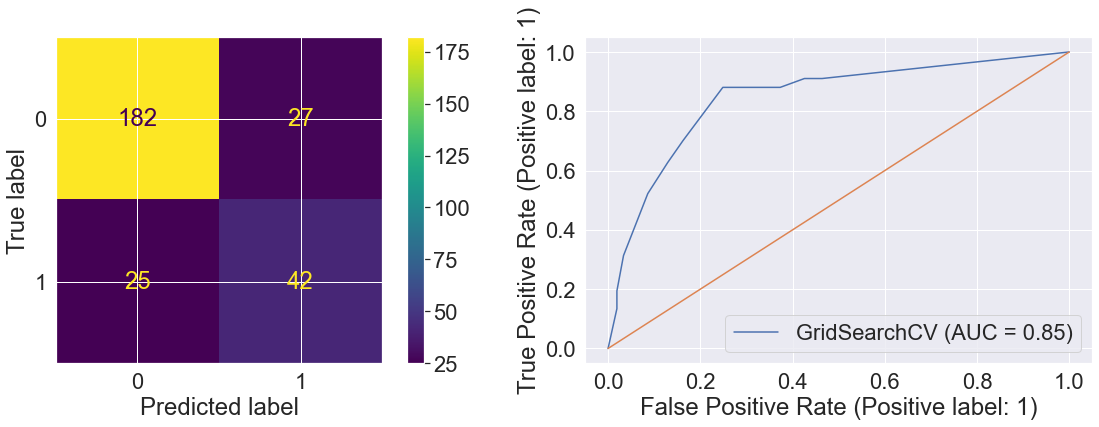

In [134]:
#Examine both the confusion matrix and ROC curve below. 
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

ConfusionMatrixDisplay.from_estimator(grid, X_test, y8_test, ax = ax[0])

RocCurveDisplay.from_estimator(grid, X_test, y8_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

In [135]:
preds = grid.predict(X_test)
tree_accuracy = grid.score(X_test, y8_test)
tree_precision = precision_score(y8_test, preds)
tree_recall = recall_score(y8_test, preds)
print(f'Accuracy: {tree_accuracy: .2f}\nPrecision: {tree_precision: .2f}\nRecall: {tree_recall: .2f}')

Accuracy:  0.81
Precision:  0.61
Recall:  0.63


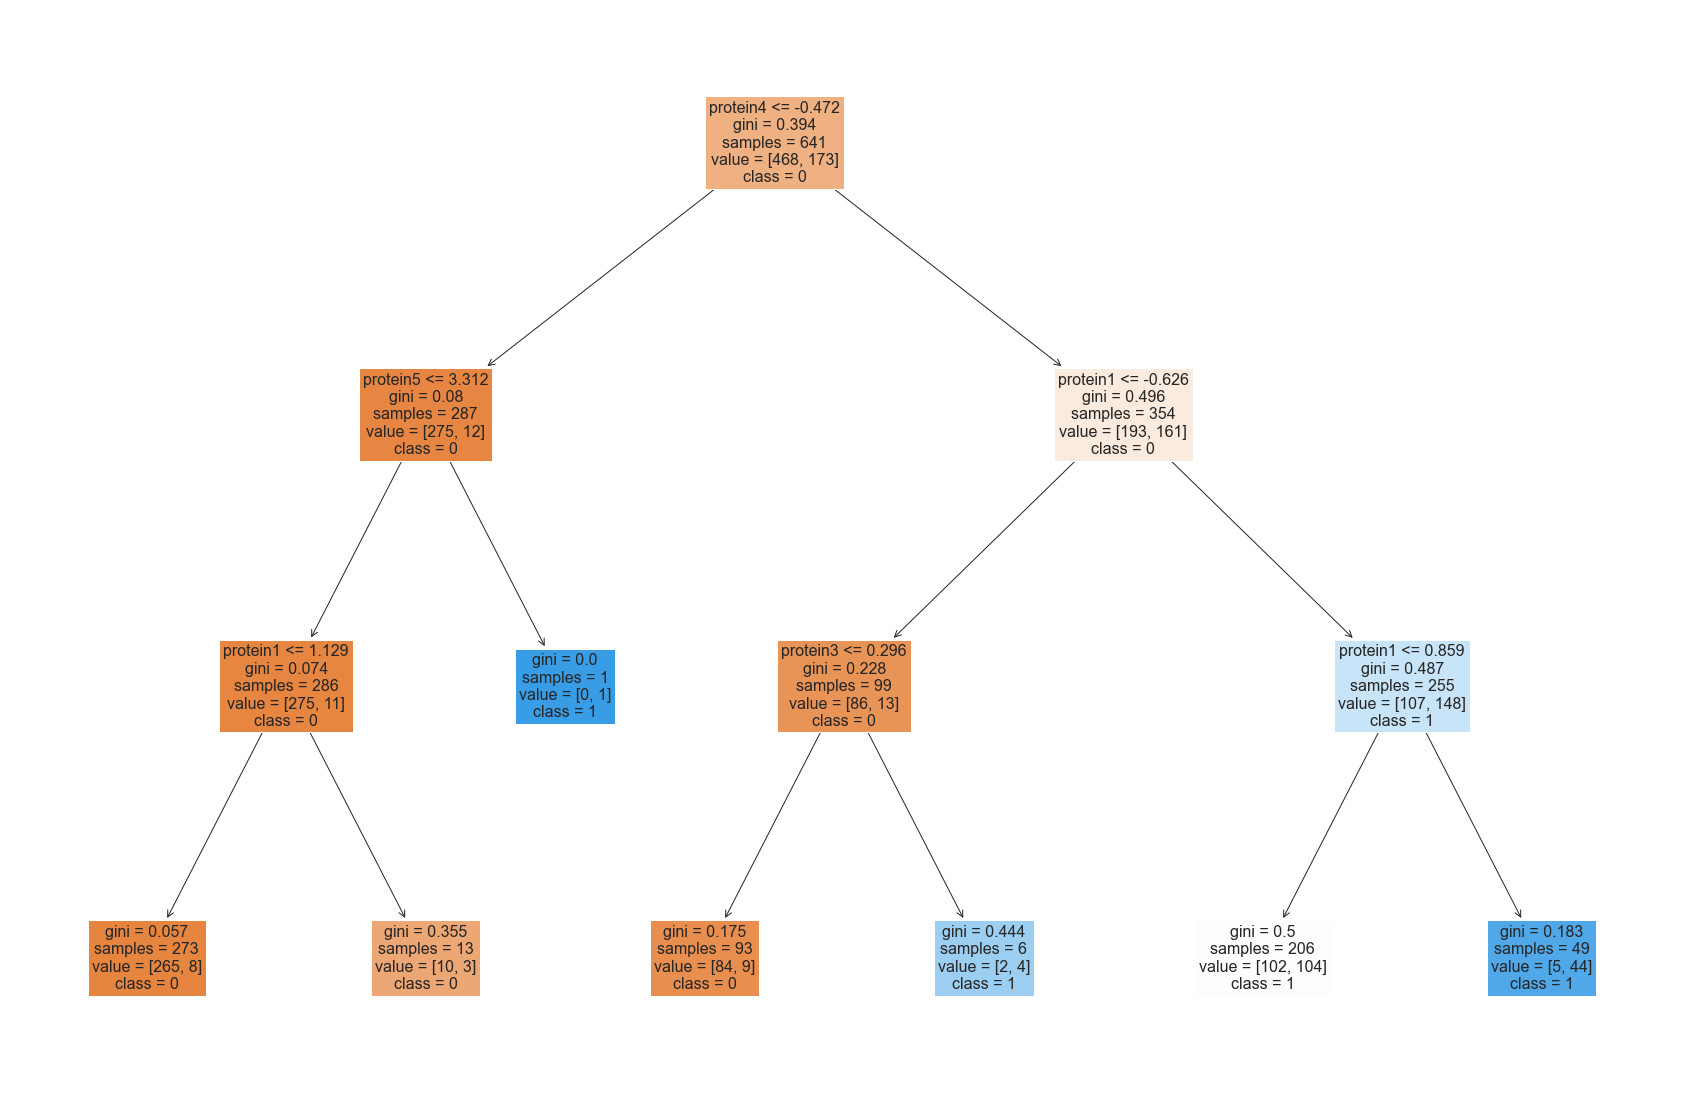

In [136]:
# plotting the decision tree with a max depth of 3 as an example
tree = DecisionTreeClassifier(max_depth = 3).fit(X_train, y8_train)
fig, ax = plt.subplots(figsize = (30, 20))
plot_tree(tree, feature_names=list(X.columns), filled=True, ax = ax, fontsize=16,class_names=['0','1']);

# 3. KNeighbors Classifier

In [137]:
# Identifying the best score model over value of K
knn_pipe = Pipeline([('knn', KNeighborsClassifier())])
grid = GridSearchCV(knn_pipe, param_grid = {'knn__n_neighbors': [2, 5, 10, 20]})
grid.fit(X_train, y8_train)
best_params = grid.best_params_
print(f'Best parameters of tree: {best_params}')

Best parameters of tree: {'knn__n_neighbors': 10}


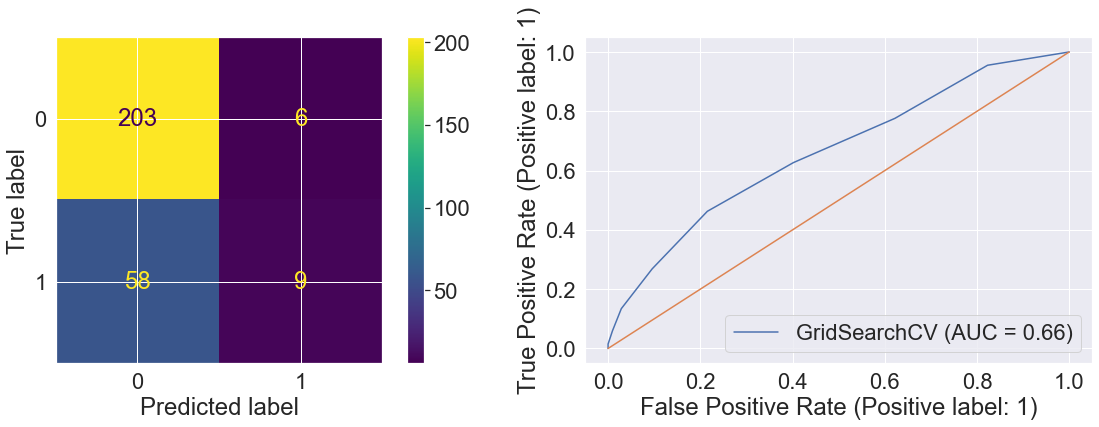

In [138]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

ConfusionMatrixDisplay.from_estimator(grid, X_test, y8_test, ax = ax[0])

RocCurveDisplay.from_estimator(grid, X_test, y8_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

In [139]:
#Calculating the accuracy, precision, and recall values.
preds = grid.predict(X_test)
knn_accuracy = grid.score(X_test, y8_test)
knn_precision = precision_score(y8_test, preds)
knn_recall = recall_score(y8_test, preds)
print(f'Accuracy: {knn_accuracy: .2f}\nPrecision: {knn_precision: .2f}\nRecall: {knn_recall: .2f}')

Accuracy:  0.77
Precision:  0.60
Recall:  0.13


# 4. Support Vector Machines

In [140]:
params = {'kernel': ['rbf', 'poly']}
svc = svm.SVC()
grid = GridSearchCV(svc, param_grid=params).fit(X_train, y8_train)

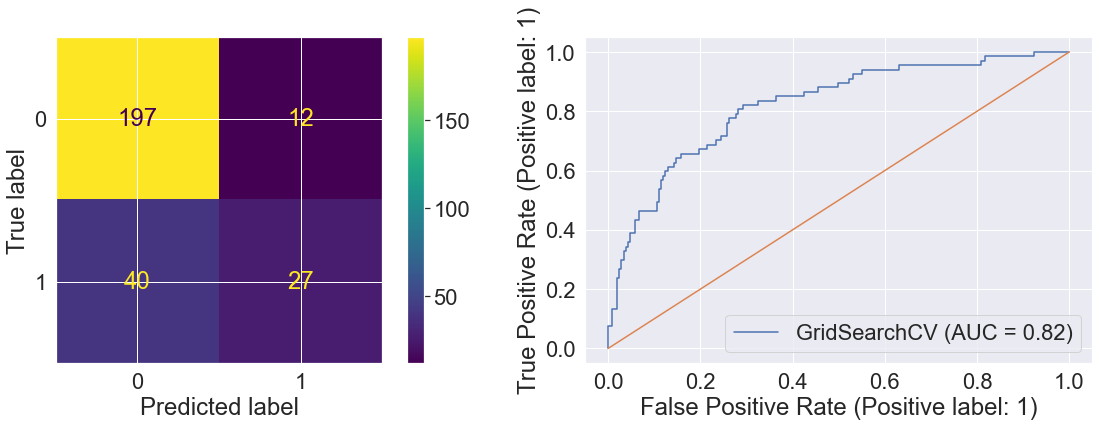

In [141]:
#Examine both the confusion matrix and ROC curve below. 
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

ConfusionMatrixDisplay.from_estimator(grid, X_test, y8_test, ax = ax[0])

RocCurveDisplay.from_estimator(grid, X_test, y8_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

In [142]:
#Calculating the accuracy, precision, and recall values.
preds = grid.predict(X_test)
svc_accuracy = grid.score(X_test, y8_test)
svc_precision = precision_score(y8_test, preds)
svc_recall = recall_score(y8_test, preds)
print(f'Accuracy: {svc_accuracy: .2f}\nPrecision: {svc_precision: .2f}\nRecall: {svc_recall: .2f}')

Accuracy:  0.81
Precision:  0.69
Recall:  0.40


# Simple Models

I decided to build simple models using only the proteins and outcome 8. This will help understand the effect of any confounding factor. Also, to see if the model improved or have the same results.

In [143]:
X1 = data.drop(['age','sex','disease','hypertension','hypercholesterolemia', 'diabetes','smoking','congestive heart failure'
                ,'coronary artery disease','stroke','statin','aspirin','outcome1','outcome2','outcome3','outcome4','outcome5','outcome6','outcome7','outcome8','outcome9'], axis = 1)

In [144]:
X1 = pd.get_dummies(X1)

In [145]:
X1_train, X1_test, y8_train, y8_test = train_test_split(X1,y8, test_size = 0.3, random_state = 42)

# Simple Decision Tree Classifier

In [146]:
params = {'max_depth': [2, 4, 5, 8,10,30,40],
         'min_samples_split': [0.1, 0.2,0.05,0.01],
          'criterion': ['gini', 'entropy', 'log_loss'],
          'min_samples_leaf': [1,2,5,10]
         }
grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params).fit(X1_train, y8_train)
grid_train_acc = grid.score(X1_train, y8_train)
tree_grid_test_acc = grid.score(X1_test, y8_test)
best_params = grid.best_params_
print(f'Best parameters of tree: {best_params}')

Best parameters of tree: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 0.1}


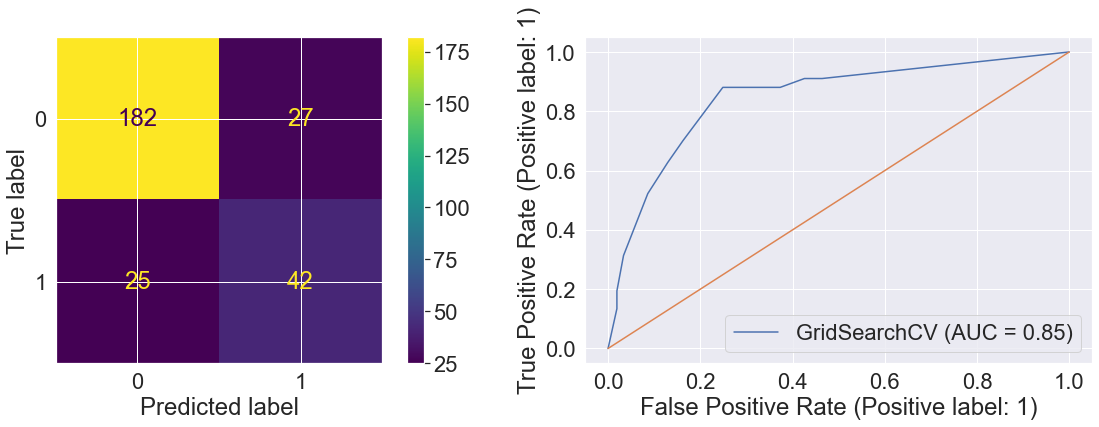

In [147]:
#Examine both the confusion matrix and ROC curve below. 
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

ConfusionMatrixDisplay.from_estimator(grid, X1_test, y8_test, ax = ax[0])

RocCurveDisplay.from_estimator(grid, X1_test, y8_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

In [148]:
preds = grid.predict(X1_test)
tree_accuracy = grid.score(X1_test, y8_test)
tree_precision = precision_score(y8_test, preds)
tree_recall = recall_score(y8_test, preds)
print(f'Accuracy: {tree_accuracy: .2f}\nPrecision: {tree_precision: .2f}\nRecall: {tree_recall: .2f}')

Accuracy:  0.81
Precision:  0.61
Recall:  0.63


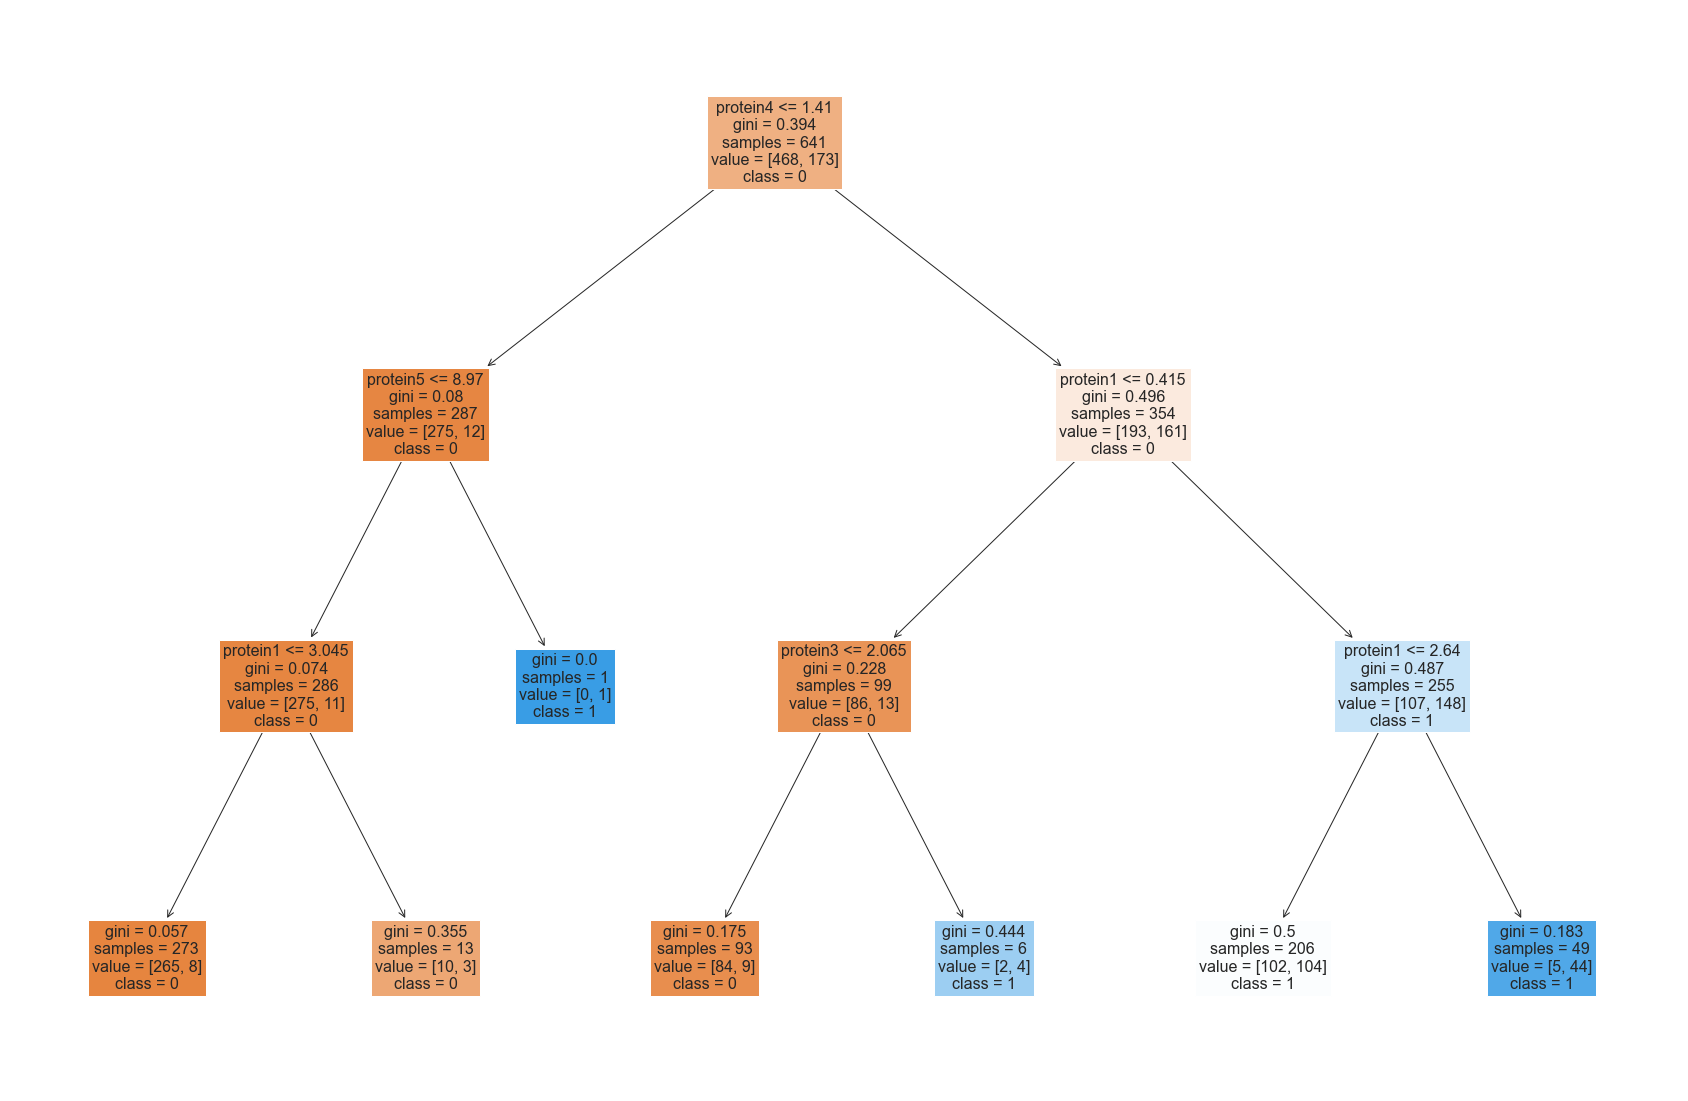

In [149]:
# plotting the decision tree with a max depth of 3 as an example
tree = DecisionTreeClassifier(max_depth = 3).fit(X1_train, y8_train)
fig, ax = plt.subplots(figsize = (30, 20))
plot_tree(tree, feature_names=list(X.columns), filled=True, ax = ax, fontsize=16,class_names=['0','1']);

# Simple Logistic Regression

In [150]:
#building the pipeline 
lgr_pipe = Pipeline([('selector', extractor),('lgr', LogisticRegression(random_state=42, max_iter = 1000))])
lgr_pipe.fit(X1_train, y8_train)

Pipeline(steps=[('selector',
                 SelectFromModel(estimator=LogisticRegression(penalty='l1',
                                                              random_state=42,
                                                              solver='liblinear'))),
                ('lgr', LogisticRegression(max_iter=1000, random_state=42))])

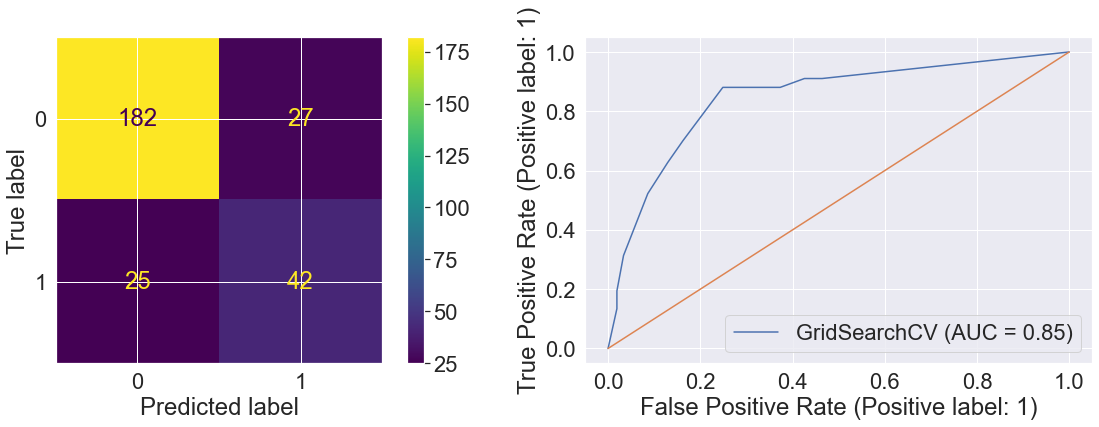

In [151]:
#Examine both the confusion matrix and ROC curve below. 
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

ConfusionMatrixDisplay.from_estimator(grid, X1_test, y8_test, ax = ax[0])

RocCurveDisplay.from_estimator(grid, X1_test, y8_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

In [152]:
#Calculating the accuracy, precision, and recall values.
preds = lgr_pipe.predict(X1_test)

log_accuracy = accuracy_score(y8_test, preds)
log_precision = precision_score(y8_test, preds)
log_recall = recall_score(y8_test, preds)
print(f'Accuracy: {log_accuracy: .2f}\nPrecision: {log_precision: .2f}\nRecall: {log_recall: .2f}')

Accuracy:  0.81
Precision:  0.67
Recall:  0.43


# Results

For outcome 8 (the primary outcome), I can see that logistic regression model was the best classifier.  This is based on the accuracy scores 82% and AUC 0.82. This tells us that using the dataset features we can classify patients into who will develop outcome 8 in the future.

I would choose a classification using decision tree with criterion = entropy, max depth = 8, min samples leaf = 2, min samples split = 0.1 over the logistic regression model. Although the decision tree classifier had slight lower accuracy than logistic region model, it had a higher recall score of 0.63. As this will assure that the false negatives are minimal. As a result, the minimum number of potential sick patients will be missed.

The resulting cut-off values for the given proteins in the decision tree can be used in practice, as health care practitioners can utilize those cut-off points to classify patients with outcome 8.